In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_csv('IESCO_dataset.csv')
df.dropna(inplace=True)
describe = df.describe()
print(describe)

              Hour       DryBulb        DewPnt  target_variable      Humidity
count  13128.00000  13128.000000  13128.000000     13128.000000  13128.000000
mean      12.50000     43.444851     31.902118      1212.993068     69.366469
std        6.92245     19.413433     20.883705       357.145898     17.259005
min        1.00000     -7.000000    -24.000000       430.000000     14.000000
25%        6.75000     29.000000     17.000000       973.000000     58.000000
50%       12.50000     40.000000     30.000000      1125.000000     71.000000
75%       18.25000     58.000000     50.000000      1386.250000     83.000000
max       24.00000     93.000000     75.000000      2713.000000     99.000000


In [3]:
x = df
y = df["target_variable"]
df.shape
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(df)
s2 = MinMaxScaler(feature_range=(0,1))
ys = s2.fit_transform(df[['target_variable']])

In [4]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(ys[i])
X,Y = np.array(X), np.array(Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf    

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=1, activation='linear', name='output_layer')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1278 - val_loss: 0.0472
Epoch 1/200 - Train Loss: 0.0781 - Val Loss: 0.0472
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0470 - val_loss: 0.0410
Epoch 2/200 - Train Loss: 0.0468 - Val Loss: 0.0410
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0436 - val_loss: 0.0382
Epoch 3/200 - Train Loss: 0.0427 - Val Loss: 0.0382
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0412 - val_loss: 0.0378
Epoch 4/200 - Train Loss: 0.0406 - Val Loss: 0.0378
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0388 - val_loss: 0.0344
Epoch 5/200 - Train Loss: 0.0378 - Val Loss: 0.0344
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0357 - val_loss: 0.0314
Epoch 6/200 - Train Loss: 0.0341 - Val Loss: 0.0314
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0323 - val_loss: 0.0249
Epoch 7/200 - Train Loss: 0.0316 - Val Loss: 0.0249
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0306 - val_loss: 0.0326
Epoch 8/200 - Train Loss: 0.0304 - V

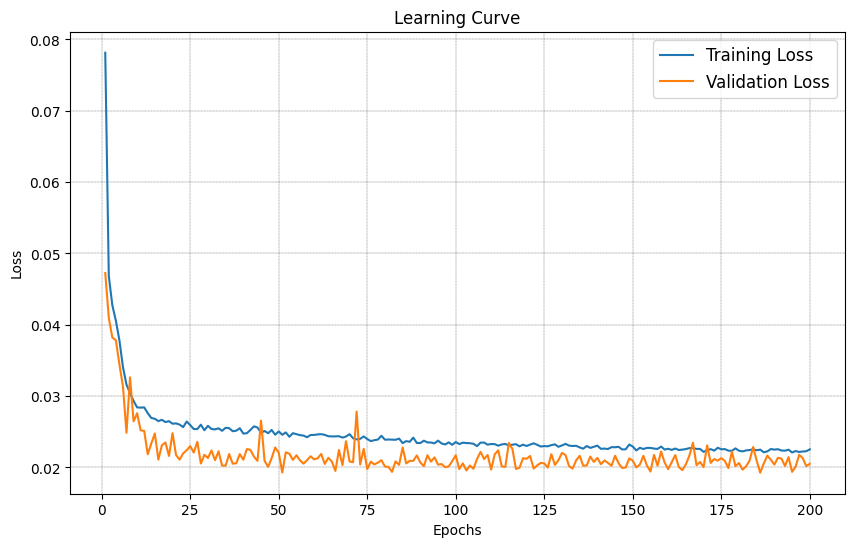

In [8]:
import time

import matplotlib.pyplot as plt

train_losses = []
val_losses = []

start = time.time()
epochs = 200

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), 
                        verbose=1, batch_size=32)
    

    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

end = time.time()
convergence_time = end - start


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
plt.legend(prop={"size":12})
plt.grid(True)

plt.show()

In [9]:
start= time.time()
y_pred= model.predict(X_test)
end= time.time()
inference_time= end-start

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [10]:
y_pred = s2.inverse_transform(y_pred)
y_test = s2.inverse_transform(y_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [12]:

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae =  mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse= mean_squared_error(y_test, y_pred)
nrmse = (rmse/np.mean(y_pred))*100
print("conergence time is:", convergence_time)
print("inference time is:",inference_time)
print("RMSE: ", rmse)
print("mae", mae)
print("mape", mape)
print("mse",mse)
print("nrmse", nrmse)

conergence time is: 152.79031991958618
inference time is: 0.46178269386291504
RMSE:  67.58223183199856
mae 46.799618350074404
mape 4.6574157996977785
mse 4567.358059393999
nrmse 6.396414287858494
